In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import scipy
from scipy import stats

import os
import tensorflow as tf

from tensorflow import keras

from tensorflow.python.keras import models, layers, optimizers, utils
from tensorflow.keras.applications.vgg16 import preprocess_input
import tensorflow_hub as hub


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
base = 'D:/Eliminar Despues/archive'

train_dir = os.path.join(base,'train')
test_dir = os.path.join(base, 'test')
validation_dir = os.path.join(base, 'valid')


train = keras.preprocessing.image_dataset_from_directory(train_dir, image_size=(224, 224), seed=42, batch_size=32)
test = keras.preprocessing.image_dataset_from_directory(test_dir, image_size=(224, 224), seed=42, batch_size=16)
validation = keras.preprocessing.image_dataset_from_directory(validation_dir, image_size=(224, 224), seed=42, batch_size=16)


Found 13492 files belonging to 100 classes.


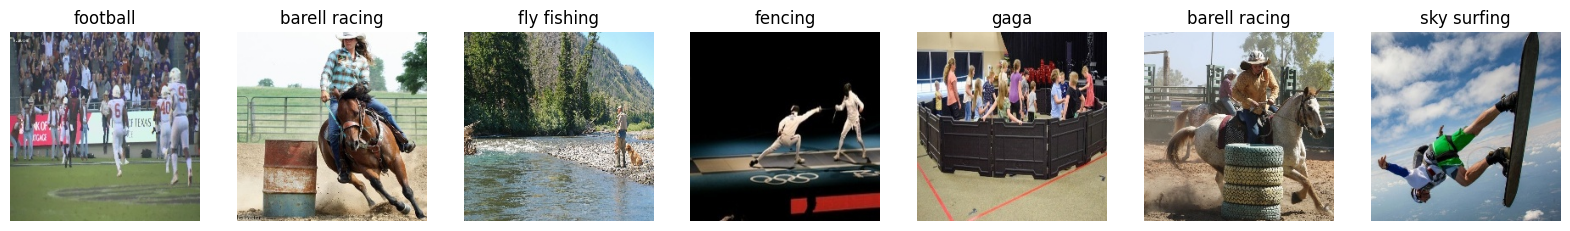

In [ ]:
# Select 7 different image files
image_files = []
sport_names = []
number_images = 7
for i in range(number_images):
    sport_dir = random.choice(os.listdir(train_dir))
    sport_path = os.path.join(train_dir, sport_dir)
    image_file = random.choice(os.listdir(sport_path))
    image_path = os.path.join(sport_path, image_file)
    image_files.append(image_path)
    sport_names.append(sport_dir)

# Load and display the images horizontally
fig, axs = plt.subplots(1, number_images, figsize=(20, 3))
for i in range(number_images):
    # Load the image from the file
    image_path = image_files[i]
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    image_array = tf.keras.preprocessing.image.img_to_array(image)

    # Rescale the pixel values between 0 and 1
    image_array /= 255.

    # Get the sport name from the list
    sport_name = sport_names[i]

    # Display the image with the sport name as the title
    axs[i].imshow(image_array)
    axs[i].set_title(sport_name)
    axs[i].axis('off')

plt.show()


In [ ]:

img_size = (224, 224)
batch_size = 32

# Define the data generators for training, validation, and testing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)
val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 13492 images belonging to 100 classes.
Found 510 images belonging to 100 classes.
Found 500 images belonging to 100 classes.


> ### Improve the model

In [ ]:
# Improve the base model
from tensorflow.keras.optimizers import SGD

# Define the CNN model
model = Sequential([
    Conv2D(64, (3, 3), activation="relu", padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation="relu", padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu", padding='same'),
    Conv2D(128, (3, 3), activation="relu", padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation="relu", padding='same'),
    Conv2D(256, (3, 3), activation="relu", padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(1024, activation="relu"),
    Dense(512, activation="relu"),
    Dense(100, activation="softmax")
])

# Compile the model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    optimizer=opt,
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,  # Increase the number of epochs
    validation_data=val_generator
)
# Save the model
model.save('improved_model.keras')
model.save('improved_model.h5')

Epoch 1/10
  3/422 [..............................] - ETA: 24:37:26 - loss: 4.6043 - accuracy: 0.0000e+00